<a href="https://colab.research.google.com/github/Jose-Luis25/EstadisticaVerano/blob/main/gym_members_exercise_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Jose-Luis25/EstadisticaVerano/refs/heads/main/gym_members_exercise_tracking.csv")
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


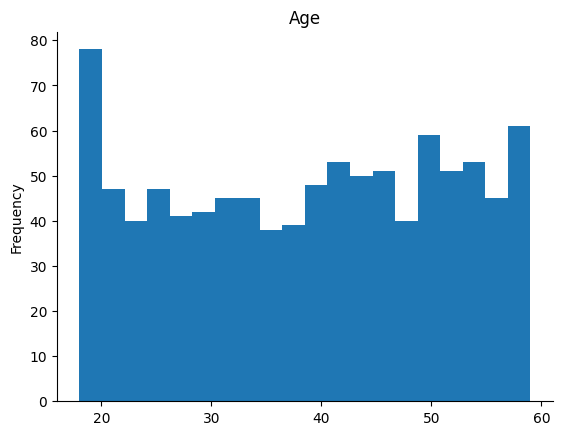

In [60]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [61]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols("Calories_Burned ~ C(Gender)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,1.639714e+06,1.639714e+06,22.547934,0.000002
Residual,971.0,7.061235e+07,7.272126e+04,NaN,NaN


In [62]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [63]:
from scipy.stats import shapiro
_,valor_p_sh=shapiro(modelo_lineal.resid)
print("valor_p_shapiro=", valor_p_sh)

valor_p_shapiro= 0.00019903313691842486


In [64]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Gender'] == 'Male']['Calories_Burned']
grupo2 = df[df['Gender'] == 'Female']['Calories_Burned']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.0021906699819997854


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Female   Male  82.2071   0.0 48.2331 116.181   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

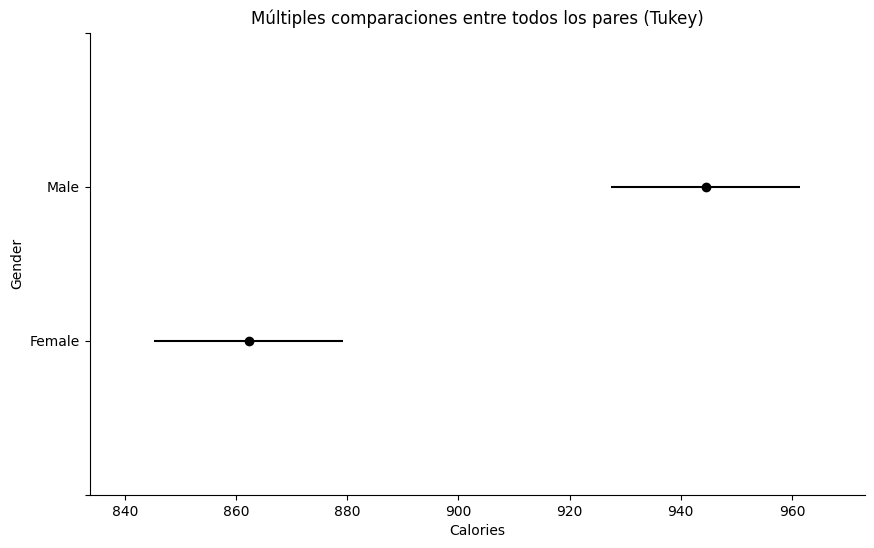

In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Calories_Burned'], groups=df['Gender'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Gender", xlabel="Calories")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [66]:
df["Gender"] = df["Gender"].map({"Male":2,"Female":1})
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,2,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,1,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,1,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,2,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,2,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,2,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,2,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,1,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,2,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [67]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols("Calories_Burned ~ C(Workout_Type)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Workout_Type),3.0,2.116701e+05,70556.703442,0.949043,0.41624
Residual,969.0,7.204039e+07,74345.089042,NaN,NaN


valor-p (Shapiro) = 2.4291767943152403e-05


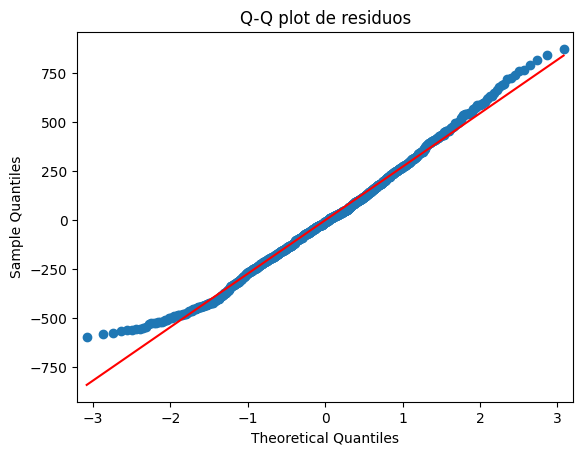

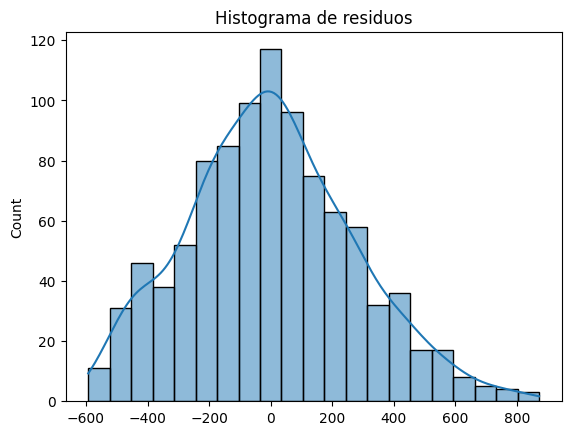

In [68]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [69]:
df["Workout_Type"].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [70]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Workout_Type'] == 'Yoga']['Calories_Burned']
grupo2 = df[df['Workout_Type'] == 'HIIT']['Calories_Burned']
grupo3 = df[df['Workout_Type'] == 'Cardio']['Calories_Burned']
grupo4 = df[df['Workout_Type'] == 'Strength']['Calories_Burned']


stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.788993613463197


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
  Cardio     HIIT  41.2917 0.3523 -23.1974 105.7809  False
  Cardio Strength  26.1839 0.6973 -35.7784  88.1463  False
  Cardio     Yoga  18.6746 0.8721 -44.5002  81.8494  False
    HIIT Strength -15.1078 0.9306 -79.4226  49.2071  False
    HIIT     Yoga -22.6171 0.8107 -88.1009  42.8666  False
Strength     Yoga  -7.5094   0.99 -70.5062  55.4875  False
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

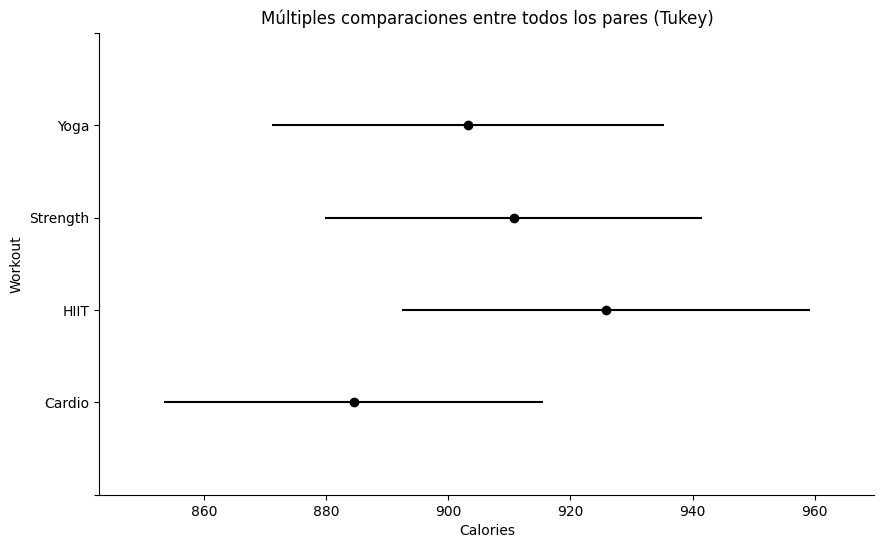

In [71]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Calories_Burned'], groups=df['Workout_Type'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Workout", xlabel="Calories")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [72]:
df = df.drop(columns=["Workout_Type"])
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,2,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,1,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,1,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,2,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,2,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,2,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77
969,25,2,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69
970,59,1,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50
971,32,2,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Gender'),
  Text(0, 2.5, 'Weight (kg)'),
  Text(0, 3.5, 'Height (m)'),
  Text(0, 4.5, 'Max_BPM'),
  Text(0, 5.5, 'Avg_BPM'),
  Text(0, 6.5, 'Resting_BPM'),
  Text(0, 7.5, 'Session_Duration'),
  Text(0, 8.5, 'Calories_Burned'),
  Text(0, 9.5, 'Fat_Percentage'),
  Text(0, 10.5, 'Water_Intake (liters)'),
  Text(0, 11.5, 'Workout_Frequency (days/week)'),
  Text(0, 12.5, 'Experience_Level'),
  Text(0, 13.5, 'BMI')])

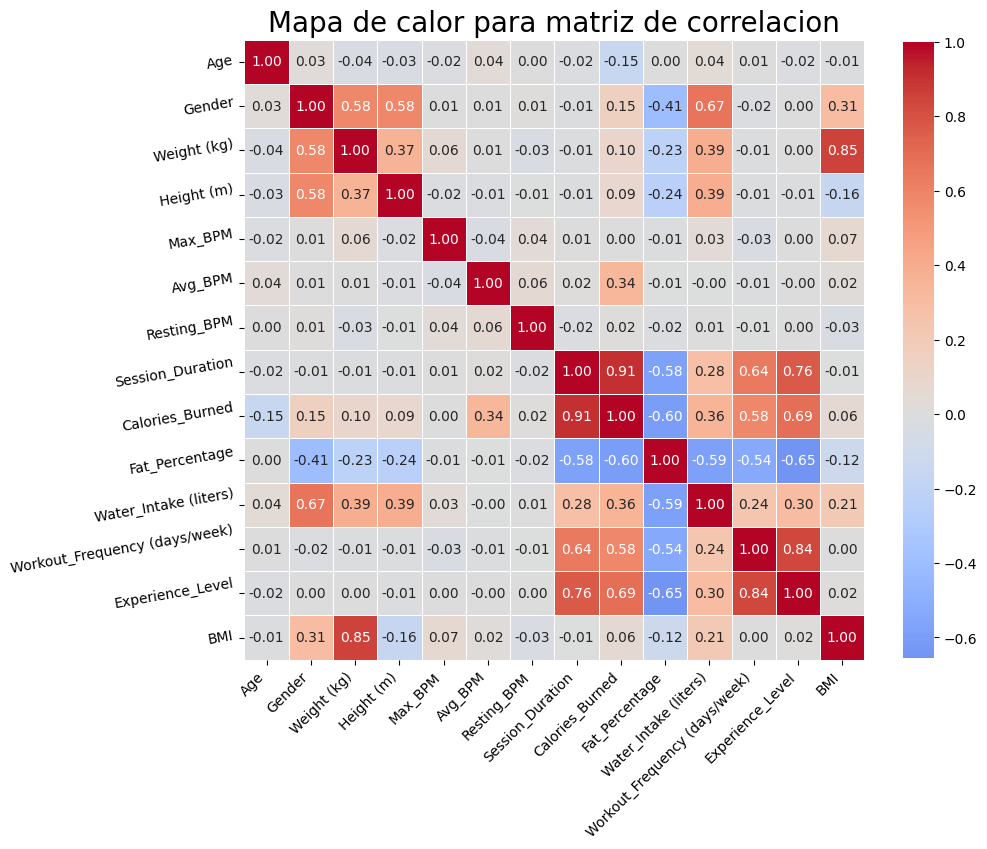

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(
    matriz_de_correlacion,#LO QUE VA A GRAFICAR
    annot=True,#SE MUESTRAN LOS VALORES EN LAS CELDAS
    fmt="0.2f",#0.2f SIGNIFICA "DOS DECIMALES"
    cmap="coolwarm",#PALETA DE COLORES
    square=True,#FORZA CUADRADOS
    linewidths=0.5,#GROSOR DE LINEAS
    cbar_kws={"shrink":0.8},#TAMAÑO BARRA LATERAL
    center=0
)
plt.title("Mapa de calor para matriz de correlacion", fontsize=20),
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=10)


Coeficiente de correlación:  0.9081

Coeficiente de determinación:  0.8247

Intervalo de confianza para b1 de  95%
 700.8303 < b1 <  742.7418

valor-p de Shapiro:  0.0038

valor_p de Breusch-Pagan:  0.0000

para x = 0.5 y = [359.44654911]
para x = 1.5, y = [1081.23256503]
para x = 2.0 y = [1442.12557298]

          mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2885.697605  29.525372    2827.756716    2943.638494   2654.213033   

   obs_ci_upper  
0   3117.182176  


,df,sum_sq,mean_sq,F,PR(>F)
Session_Duration,1.0,5.958764e+07,5.958764e+07,4568.674447,0.0
Residual,971.0,1.266442e+07,1.304265e+04,NaN,NaN


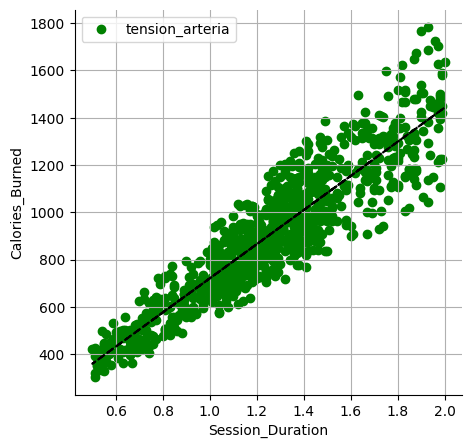

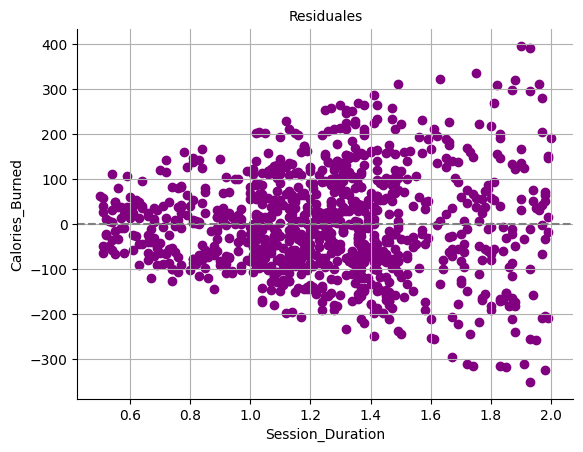

In [74]:
x = df["Session_Duration"]
y = df["Calories_Burned"]


#2 Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(x, y, label = "tension_arteria", color = 'green')
plt.xlabel("Session_Duration") # nombrar eje x
plt.ylabel("Calories_Burned") # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)
plt.legend()#APARECE LO QUE INDICA EL PUNTO
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA

#3¿Los datos soportan la suposición de linealidad?

#SI

#4 Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')



# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')



# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')



# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.title("Residuales", fontsize = 10)
plt.scatter(x, residuales, color = 'purple')
plt.xlabel("Session_Duration")
plt.ylabel("Calories_Burned")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')



# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# 11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno

print(f'para x = 0.5 y = {modelo.predict([1, 0.5])}')
print(f'para x = 1.5, y = {modelo.predict([1, 1.5])}')
print(f'para x = 2.0 y = {modelo.predict([1, 2.0])}\n')
print(modelo.get_prediction([1, 4]).summary_frame(alpha = 0.05))


# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("Calories_Burned ~ Session_Duration", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova